In [1]:
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from supervised_ensemble.util import plot_decision_boundary

In [2]:
np.random.seed(10)

Create data

In [19]:
N = 500
D = 2
X = np.random.randn(N, D)

Create noisy XOR

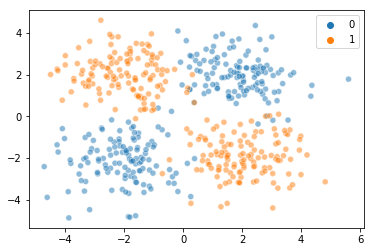

In [20]:
sep = 2
X[:125] += np.array([sep, sep])
X[125:250] += np.array([sep, -sep])
X[250:375] += np.array([-sep, -sep])
X[375:] += np.array([-sep, sep])
Y = np.array([0] * 125 + [1] * 125 + [0] * 125 + [1] * 125)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, alpha=0.5)

Single Decision tree

Score: 1.0


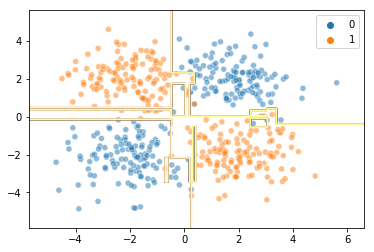

In [24]:
model = DecisionTreeClassifier()
model.fit(X, Y)
print("Score:", model.score(X, Y))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, alpha=0.5)
plot_decision_boundary(X, model)

Create Bagged model

In [25]:
class BaggedTreeClassifier:
  def __init__(self, B):
    self.B = B

  def fit(self, X, Y):
    N = len(X)
    self.models = []
    for b in range(self.B):
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]

      model = DecisionTreeClassifier(max_depth=2)
      model.fit(Xb, Yb)
      self.models.append(model)

  def predict(self, X):
    # no need to keep a dictionary since we are doing binary classification
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X)
    return np.round(predictions / self.B)

  def score(self, X, Y):
    P = self.predict(X)
    return np.mean(Y == P)

Score for bagged model: 0.724


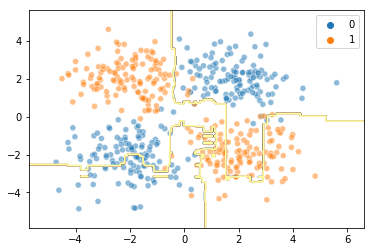

In [26]:
model = BaggedTreeClassifier(200)
model.fit(X, Y)
print("Score for bagged model:", model.score(X, Y))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, alpha=0.5)
plot_decision_boundary(X, model)
